## 岭回归

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

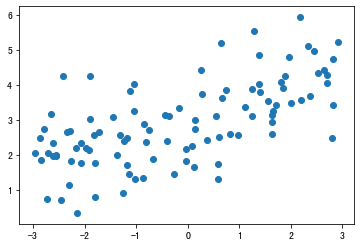

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge

def ridgeRegression(degree,alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', Ridge(alpha=alpha))
    ])

def polynomialFeaturesRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [10]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.metrics import mean_squared_error

poly_reg = polynomialFeaturesRegression(20)
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

167.9401087009438

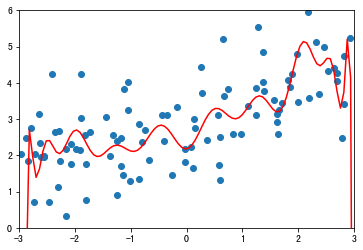

In [12]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

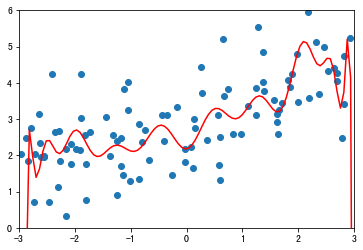

In [13]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

In [15]:
ridge1_reg = ridgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754155471

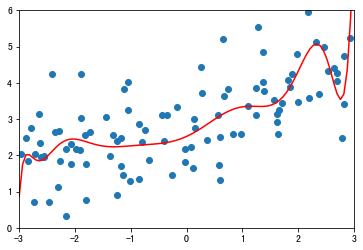

In [16]:
plot_model(ridge1_reg)

In [18]:
ridge2_reg = ridgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218448

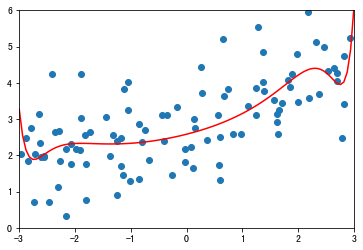

In [19]:
plot_model(ridge2_reg)

In [20]:
ridge3_reg = ridgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

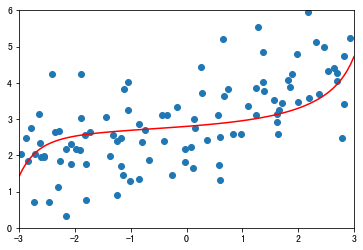

In [21]:
plot_model(ridge3_reg)

In [22]:
ridge4_reg = ridgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408455590998372

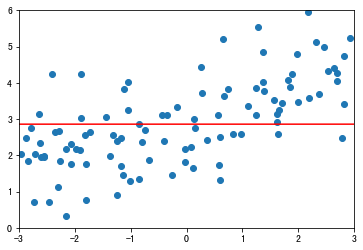

In [23]:
plot_model(ridge4_reg)